## **Load Test Dataset**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

img_size = (224, 224)
batch_size = 32

test_dir  = "/content/drive/MyDrive/Data/Teeth_Dataset/Testing"


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1027 images belonging to 7 classes.


---
## **Load Model**

In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall

# Path to your saved model
model_path = "/content/drive/MyDrive/Data/Teeth_Dataset/model_Teeth.keras"

# Load and keep compile=True so metrics are restored.
# Provide custom_objects for Precision/Recall to avoid "Unknown metric" errors.
model = load_model(
    model_path,
    compile=True,
    custom_objects={"Precision": Precision, "Recall": Recall}
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,688,119 (63.66 MB)

 Trainable params: 5,562,631 (21.22 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 11,125,264 (42.44 MB)

---
## **Evaluate The Model**

In [14]:
loss, acc, prec, rec = model.evaluate(test_gen, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/33 ━━━━━━━━━━━━━━━━━━━━ 3:25 19s/step - accuracy: 0.9754 - loss: 0.0511 - precision: 0.9793 - recall: 0.9752

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x79d4698766b0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.12/dist-packages/PIL/Image.py", line 3580, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x79d4698766b0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_1962]

---
the UnknownError with **UnidentifiedImageError** means that inside your test_dir there’s at least one file that is not a valid image


In [15]:
import os
from PIL import Image

test_dir = "/content/drive/MyDrive/Data/Teeth_Dataset/Testing"

def find_non_image_files(directory):
    non_image_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify() # Verify that the file is an image
            except (IOError, SyntaxError, Image.UnidentifiedImageError) as e:
                non_image_files.append(file_path)
                print(f"Could not open or verify {file_path}: {e}")
    return non_image_files

print("Checking for non-image files in the test directory...")
non_images = find_non_image_files(test_dir)

if non_images:
    print("\nFound the following non-image files:")
    for f in non_images:
        print(f)
    print("\nPlease remove these files from your test directory and then re-run the evaluation cell.")
else:
    print("\nNo non-image files found in the test directory.")

Checking for non-image files in the test directory...
Could not open or verify /content/drive/MyDrive/Data/Teeth_Dataset/Testing/OC/oc_1253_0_6065.jpg: cannot identify image file '/content/drive/MyDrive/Data/Teeth_Dataset/Testing/OC/oc_1253_0_6065.jpg'

Found the following non-image files:
/content/drive/MyDrive/Data/Teeth_Dataset/Testing/OC/oc_1253_0_6065.jpg

Please remove these files from your test directory and then re-run the evaluation cell.


In [16]:
import os

file_to_remove = "/content/drive/MyDrive/Data/Teeth_Dataset/Testing/OC/oc_1253_0_6065.jpg"

if os.path.exists(file_to_remove):
    os.remove(file_to_remove)
    print(f"Removed: {file_to_remove}")
else:
    print(f"File not found: {file_to_remove}")

Removed: /content/drive/MyDrive/Data/Teeth_Dataset/Testing/OC/oc_1253_0_6065.jpg


**Make Sure to Rebuild the generator**

In [19]:
loss, acc, prec, rec = model.evaluate(test_gen, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 893ms/step - accuracy: 0.9747 - loss: 0.0541 - precision: 0.9782 - recall: 0.9738
Test Loss: 0.0613
Test Accuracy: 0.9727
Test Precision: 0.9755
Test Recall: 0.9708


In [20]:
import numpy as np

y_pred_probs = model.predict(test_gen, verbose=1)           # shape (N,7)
y_pred_classes = np.argmax(y_pred_probs, axis=1)            # predicted labels
y_true = test_gen.classes                                   # true labels
class_names = list(test_gen.class_indices.keys())           # class labels in order


33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step


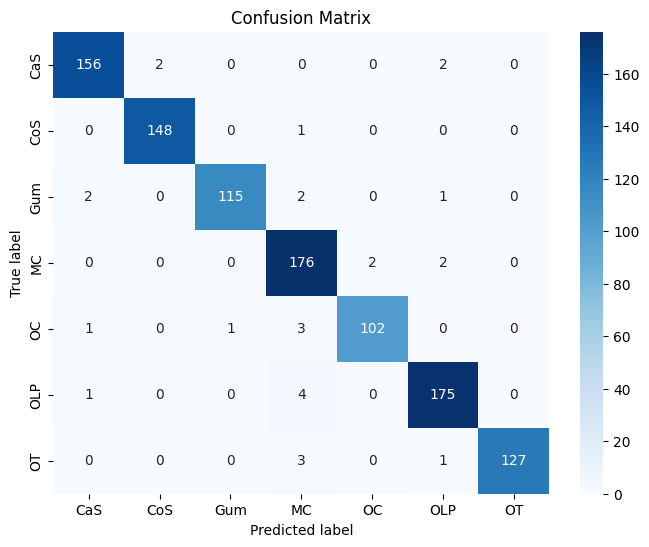

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix")
plt.show()


In [24]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

         CaS       0.97      0.97      0.97       160
         CoS       0.99      0.99      0.99       149
         Gum       0.99      0.96      0.97       120
          MC       0.93      0.98      0.95       180
          OC       0.98      0.95      0.97       107
         OLP       0.97      0.97      0.97       180
          OT       1.00      0.97      0.98       131

    accuracy                           0.97      1027
   macro avg       0.98      0.97      0.97      1027
weighted avg       0.97      0.97      0.97      1027



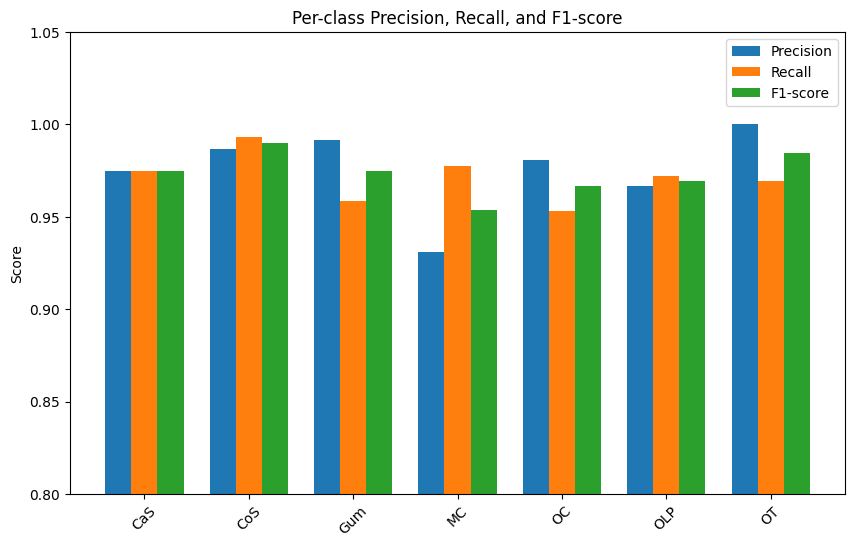

In [25]:
# Get report as dict instead of text
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

# Extract metrics
precision = [report[label]["precision"] for label in class_names]
recall    = [report[label]["recall"] for label in class_names]
f1_score  = [report[label]["f1-score"] for label in class_names]

x = np.arange(len(class_names))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label="Precision")
plt.bar(x, recall, width, label="Recall")
plt.bar(x + width, f1_score, width, label="F1-score")

plt.xticks(x, class_names, rotation=45)
plt.ylim(0.8, 1.05)  # zoom in to see differences better
plt.ylabel("Score")
plt.title("Per-class Precision, Recall, and F1-score")
plt.legend()
plt.show()


---
## **Predicte Single image from Test Dataset**

In [32]:
from tensorflow.keras.preprocessing import image

def test_single_image(model, img_path, class_indices):
    # Extract true label from the path (folder name)
    true_label = os.path.basename(os.path.dirname(img_path))

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map index to class label
    labels = {v: k for k, v in class_indices.items()}
    predicted_label = labels[predicted_class]

    # Show results
    print(f"True label: {true_label}")
    print(f"Predicted label: {predicted_label}")

    # Display image with predicted label
    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis("off")
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
True label: Gum
Predicted label: Gum


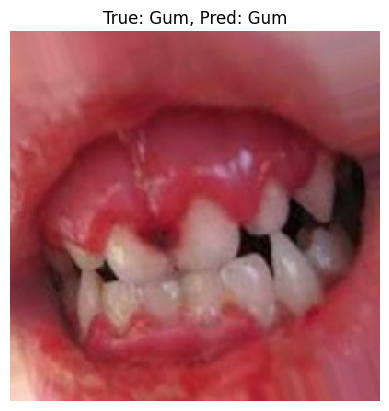

In [37]:
test_single_image(
    model,
    "/content/drive/MyDrive/Data/Teeth_Dataset/Testing/Gum/g_1214_0_9352.jpg",
    test_gen.class_indices
)